#  **一、项目背景**

   车牌识别主要用于项目现场车辆进出管理。对于车牌检测考虑到车牌标注数据集少，因此本案例项目在训练时使用已经标注信息的车牌数据。经过数据集分析发现车牌数据有中文+ 英文 + 数字组成，且车牌图像存在大量背景信息的干扰识别训练。因此考虑使用PaddleOCR 文字识别算法进行训练。 本案例采集并标注了100000张图像用于识别模型训练，10000张图像用于图像识别模型验证，以下Notebook 包括了PaddleOCR 环境准备、数据集准备、识别模型训练和调优、模型推理，训练好的模型存放在output文件夹。


# **二、车牌识别难点**

通过原始数据集分析下，认为在车牌图像文字识别过程中存在如下难点，需要通过识别算法进行优化：

* 文件分辨率低；
* 图像模糊，尤其是运动模糊；
* 由于强光，反射或阴影造成的光照和对比度较差；
* 采集车牌时，车道在相机视角中发生改变；


# **三、 基础环境准备**
运行下方代码，获取PaddleOCR以及安装PaddleOCR的依赖库。

In [ ]:
import os
import sys
#!git clone https://gitee.com/paddlepaddle/PaddleOCR.git
# 切换工作目录
os.chdir("/home/aistudio/PaddleOCR/")
# 安装依赖
!pip install -U pip
!pip install -r requirements.txt

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     |████████████████████████████████| 1.1 MB 19.5 MB/s            
     |████████████████████████████████| 13.3 MB 86.4 MB/s            
     |████████████████████████████████| 948 kB 76.8 MB/s            
     |████████████████████████████████| 603 kB 61.4 MB/s            
     |████████████████████████████████| 298 kB 80.3 MB/s            
     |████████████████████████████████| 50 kB 27.0 MB/s            
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 55.7 MB 128 kB/s             
     |████████████████████████████████| 6.4 MB 51.4 MB/s            
     |████████████████████████████████| 178 kB 77.7 MB/s            
     |████████████████████████████████| 6.1 MB 76.8 MB/s            
     |████████████████████████████████| 404 kB 48.1 MB/s            
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2-cp

#  四、数据集准备
车牌识别数据：https://aistudio.baidu.com/aistudio/datasetdetail/100920

当前项目已默认加载这车牌数据集，运行下方代码解压数据集到data文件夹下。

In [ ]:
import os
import sys
os.chdir("/home/aistudio/data/data100920")
!unzip -oq /home/aistudio/data/data100920/车牌.zip

In [ ]:
#!wget -P ./pretrain_models/ https://paddle-imagenet-models-name.bj.bcebos.com/dygraph/MobileNetV3_large_x0_5_pretrained.pdparams

--2022-01-19 12:31:16--  https://paddle-imagenet-models-name.bj.bcebos.com/dygraph/MobileNetV3_large_x0_5_pretrained.pdparams
Resolving paddle-imagenet-models-name.bj.bcebos.com (paddle-imagenet-models-name.bj.bcebos.com)... 182.61.200.229, 182.61.200.195, 2409:8c04:1001:1002:0:ff:b001:368a
Connecting to paddle-imagenet-models-name.bj.bcebos.com (paddle-imagenet-models-name.bj.bcebos.com)|182.61.200.229|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16255295 (16M) [application/octet-stream]
Saving to: ‘./pretrain_models/MobileNetV3_large_x0_5_pretrained.pdparams’

MobileNetV3_large_x 100%[===================>]  15.50M  22.0MB/s    in 0.7s    

2022-01-19 12:31:17 (22.0 MB/s) - ‘./pretrain_models/MobileNetV3_large_x0_5_pretrained.pdparams’ saved [16255295/16255295]



# 四、车牌检测模型训练


|  ID  |  Model  |  Pretrain  |Precision  | hmean  | Recall  | Epoch  | Data Marks  |
| -------- | -------- | -------- | -------- | -------- | -------- | -------- | -------- | 
| 1 | det_mv3_db    | 0.0    | 0.04 |  | | 20 |0|
| 2 | det_mv3_db    | 0.04    | 0.7975 | 0.88 | 0.9825 | 500 |400|
| 3 | det_mv3_db    | 0.7975   |0.9147|0.9470|0.9816| 500 |600|
| 4 | det_mv3_db    | 0.9147   |0.9413|0.9515|0.9620| 500 |1000|

In [ ]:
#检测模型训练
!python /home/aistudio/PaddleOCR/tools/train.py -c /home/aistudio/PaddleOCR/configs/det/det_mv3_db.yml

In [ ]:
#检测模型评估
!python /home/aistudio/PaddleOCR/tools/eval.py -c /home/aistudio/PaddleOCR/configs/det/det_mv3_db.yml -o Global.checkpoints=/home/aistudio/output/db_mv3/best_accuracy

[2022/01/25 09:43:32] root INFO: Architecture : 
[2022/01/25 09:43:32] root INFO:     Backbone : 
[2022/01/25 09:43:32] root INFO:         model_name : large
[2022/01/25 09:43:32] root INFO:         name : MobileNetV3
[2022/01/25 09:43:32] root INFO:         scale : 0.5
[2022/01/25 09:43:32] root INFO:     Head : 
[2022/01/25 09:43:32] root INFO:         k : 50
[2022/01/25 09:43:32] root INFO:         name : DBHead
[2022/01/25 09:43:32] root INFO:     Neck : 
[2022/01/25 09:43:32] root INFO:         name : DBFPN
[2022/01/25 09:43:32] root INFO:         out_channels : 256
[2022/01/25 09:43:32] root INFO:     Transform : None
[2022/01/25 09:43:32] root INFO:     algorithm : DB
[2022/01/25 09:43:32] root INFO:     model_type : det
[2022/01/25 09:43:32] root INFO: Eval : 
[2022/01/25 09:43:32] root INFO:     dataset : 
[2022/01/25 09:43:32] root INFO:         data_dir : /home/aistudio/data/data100920/
[2022/01/25 09:43:32] root INFO:         label_file_list : ['/home/aistudio/work/testLabe

In [ ]:
#检测模型预测
!python /home/aistudio/PaddleOCR/tools/infer_det.py -c /home/aistudio/PaddleOCR/configs/det/det_mv3_db.yml 

[2022/01/25 09:45:19] root INFO: Architecture : 
[2022/01/25 09:45:19] root INFO:     Backbone : 
[2022/01/25 09:45:19] root INFO:         model_name : large
[2022/01/25 09:45:19] root INFO:         name : MobileNetV3
[2022/01/25 09:45:19] root INFO:         scale : 0.5
[2022/01/25 09:45:19] root INFO:     Head : 
[2022/01/25 09:45:19] root INFO:         k : 50
[2022/01/25 09:45:19] root INFO:         name : DBHead
[2022/01/25 09:45:19] root INFO:     Neck : 
[2022/01/25 09:45:19] root INFO:         name : DBFPN
[2022/01/25 09:45:19] root INFO:         out_channels : 256
[2022/01/25 09:45:19] root INFO:     Transform : None
[2022/01/25 09:45:19] root INFO:     algorithm : DB
[2022/01/25 09:45:19] root INFO:     model_type : det
[2022/01/25 09:45:19] root INFO: Eval : 
[2022/01/25 09:45:19] root INFO:     dataset : 
[2022/01/25 09:45:19] root INFO:         data_dir : /home/aistudio/data/data100920/
[2022/01/25 09:45:19] root INFO:         label_file_list : ['/home/aistudio/work/testLabe

# 五、车牌识别模型训练

为了加速训练，采用CH_PP-OCRv2预训练模型来加速训练

运行下方代码准备预训练模型。
运行前：先修改.PaddleOCR/configs/rec/ch_PP-OCRv2_rec.yml配置文件，主要包括预训练模型路径、数据集路径等。

```
Global:
  └─save_model_dir: /home/aistudio/output/rec_mobile_pp-OCRv2
  └─eval_batch_step: [0, 120]
  └─save_epoch_step: 3
  └─pretrained_model: /home/aistudio/work/best_accuracy
  └─character_dict_path: /home/aistudio/PaddleOCR/ppocr/utils/ppocr_keys_v1.txt/home/aistudio/PaddleOCR/ppocr/utils/ppocr_keys_v1.txt
  └─max_text_length: 25
  └─use_space_char: true
Train:
  └─dataset
	└─data_dir: /home/aistudio/data/data100920/train//home/aistudio/data/data100920/train/
	└─label_file_list: /home/aistudio/data/data100920/train.txt

Eval:
  └─dataset
    └─data_dir: /home/aistudio/data/data100920/test/
	└─label_file_list: /home/aistudio/data/data100920/test.txt
```

In [ ]:
!python /home/aistudio/PaddleOCR/tools/train.py -c /home/aistudio/PaddleOCR/configs/rec/ch_PP-OCRv2/ch_PP-OCRv2_rec.yml

[2022/01/09 18:30:43] root INFO: Architecture : 
[2022/01/09 18:30:43] root INFO:     Backbone : 
[2022/01/09 18:30:43] root INFO:         name : MobileNetV1Enhance
[2022/01/09 18:30:43] root INFO:         scale : 0.5
[2022/01/09 18:30:43] root INFO:     Head : 
[2022/01/09 18:30:43] root INFO:         fc_decay : 2e-05
[2022/01/09 18:30:43] root INFO:         mid_channels : 96
[2022/01/09 18:30:43] root INFO:         name : CTCHead
[2022/01/09 18:30:43] root INFO:     Neck : 
[2022/01/09 18:30:43] root INFO:         encoder_type : rnn
[2022/01/09 18:30:43] root INFO:         hidden_size : 64
[2022/01/09 18:30:43] root INFO:         name : SequenceEncoder
[2022/01/09 18:30:43] root INFO:     Transform : None
[2022/01/09 18:30:43] root INFO:     algorithm : CRNN
[2022/01/09 18:30:43] root INFO:     model_type : rec
[2022/01/09 18:30:43] root INFO: Eval : 
[2022/01/09 18:30:43] root INFO:     dataset : 
[2022/01/09 18:30:43] root INFO:         data_dir : /home/aistudio/data/data100920/tes

# 六、车牌识别模型测试评估

测试训练后模型Accuracy指标。



|  Model  | Accuracy  |
| -------- | -------- | 
| ch_PP-OCRv2_rec    | 0.988    | 



In [ ]:
#测试集评估
!python /home/aistudio/PaddleOCR/tools/eval.py -c /home/aistudio/PaddleOCR/configs/rec/ch_PP-OCRv2/ch_PP-OCRv2_rec.yml -o Global.checkpoints="/home/aistudio/output/rec_mobile_pp-OCRv2/best_accuracy"

[2022/01/09 19:31:19] root INFO: Architecture : 
[2022/01/09 19:31:19] root INFO:     Backbone : 
[2022/01/09 19:31:19] root INFO:         name : MobileNetV1Enhance
[2022/01/09 19:31:19] root INFO:         scale : 0.5
[2022/01/09 19:31:19] root INFO:     Head : 
[2022/01/09 19:31:19] root INFO:         fc_decay : 2e-05
[2022/01/09 19:31:19] root INFO:         mid_channels : 96
[2022/01/09 19:31:19] root INFO:         name : CTCHead
[2022/01/09 19:31:19] root INFO:     Neck : 
[2022/01/09 19:31:19] root INFO:         encoder_type : rnn
[2022/01/09 19:31:19] root INFO:         hidden_size : 64
[2022/01/09 19:31:19] root INFO:         name : SequenceEncoder
[2022/01/09 19:31:19] root INFO:     Transform : None
[2022/01/09 19:31:19] root INFO:     algorithm : CRNN
[2022/01/09 19:31:19] root INFO:     model_type : rec
[2022/01/09 19:31:19] root INFO: Eval : 
[2022/01/09 19:31:19] root INFO:     dataset : 
[2022/01/09 19:31:19] root INFO:         data_dir : /home/aistudio/data/data100920/tes

# 七、车牌识别模型预测部署

使用Paddle Serving套件进行部署。

## 7.1 inference 可视化

Traceback (most recent call last):
  File "tools/infer/predict_rec.py", line 31, in <module>
    from ppocr.postprocess import build_post_process
  File "/home/aistudio/PaddleOCR/ppocr/postprocess/__init__.py", line 24, in <module>
    from .db_postprocess import DBPostProcess, DistillationDBPostProcess
  File "/home/aistudio/PaddleOCR/ppocr/postprocess/db_postprocess.py", line 25, in <module>
    from shapely.geometry import Polygon
ModuleNotFoundError: No module named 'shapely'


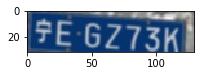

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
# 进入PaddleOCR目录
os.chdir("/home/aistudio/PaddleOCR/")

# 运行推断程序
!python tools/infer/predict_rec.py \
    --image_dir="/home/aistudio/output/inference/2-宁EGZ73K.jpg" \
    --rec_model_dir="/home/aistudio/output/rec_model/"     
  

# 可视化原始图像
img = cv2.imread("/home/aistudio/output/inference/2-宁EGZ73K.jpg")
plt.figure(figsize=(3, 8))
plt.imshow(img[..., ::-1])
plt.show()


# 7.2 Paddle Serveing 部署

In [5]:
#准备预测数据和部署环境
!wget https://paddle-serving.bj.bcebos.com/test-dev/whl/paddle_serving_server_gpu-0.7.0.post102-py3-none-any.whl
!pip install paddle_serving_server_gpu-0.7.0.post102-py3-none-any.whl

!wget https://paddle-serving.bj.bcebos.com/test-dev/whl/paddle_serving_client-0.7.0-cp37-none-any.whl
!pip install paddle_serving_client-0.7.0-cp37-none-any.whl

!wget https://paddle-serving.bj.bcebos.com/test-dev/whl/paddle_serving_app-0.7.0-py3-none-any.whl
!pip install paddle_serving_app-0.7.0-py3-none-any.whl

!rm ./*.whl

--2022-01-27 08:59:38--  https://paddle-serving.bj.bcebos.com/test-dev/whl/paddle_serving_server_gpu-0.7.0.post102-py3-none-any.whl
Resolving paddle-serving.bj.bcebos.com (paddle-serving.bj.bcebos.com)... 182.61.200.229, 182.61.200.195, 2409:8c04:1001:1002:0:ff:b001:368a
Connecting to paddle-serving.bj.bcebos.com (paddle-serving.bj.bcebos.com)|182.61.200.229|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7146257 (6.8M) [application/octet-stream]
Saving to: ‘paddle_serving_server_gpu-0.7.0.post102-py3-none-any.whl’

paddle_serving_serv 100%[===================>]   6.81M  11.3MB/s    in 0.6s    

2022-01-27 08:59:39 (11.3 MB/s) - ‘paddle_serving_server_gpu-0.7.0.post102-py3-none-any.whl’ saved [7146257/7146257]

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Processing ./paddle_serving_server_gpu-0.7.0.post102-py3-none-any.whl
     |████████████████████████████████| 82 kB 1.7 MB/s             
     |████████████████████████████████| 2.5 MB 51.8 MB

In [6]:
import os
#准备部署模型
os.chdir("/home/aistudio/PaddleOCR/deploy/pdserving/")
# 下载并解压 OCR 文本检测模型
!wget https://paddleocr.bj.bcebos.com/PP-OCRv2/chinese/ch_PP-OCRv2_det_infer.tar -O ch_PP-OCRv2_det_infer.tar && tar -xf ch_PP-OCRv2_det_infer.tar && rm ch_PP-OCRv2_det_infer.tar
# 下载并解压 OCR 文本识别模型
!wget https://paddleocr.bj.bcebos.com/PP-OCRv2/chinese/ch_PP-OCRv2_rec_infer.tar -O ch_PP-OCRv2_rec_infer.tar &&  tar -xf ch_PP-OCRv2_rec_infer.tar && rm ch_PP-OCRv2_rec_infer.tar

--2022-01-27 09:00:08--  https://paddleocr.bj.bcebos.com/PP-OCRv2/chinese/ch_PP-OCRv2_det_infer.tar
Resolving paddleocr.bj.bcebos.com (paddleocr.bj.bcebos.com)... 182.61.200.195, 182.61.200.229, 2409:8c04:1001:1002:0:ff:b001:368a
Connecting to paddleocr.bj.bcebos.com (paddleocr.bj.bcebos.com)|182.61.200.195|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3190272 (3.0M) [application/x-tar]
Saving to: ‘ch_PP-OCRv2_det_infer.tar’

ch_PP-OCRv2_det_inf 100%[===================>]   3.04M  15.8MB/s    in 0.2s    

2022-01-27 09:00:09 (15.8 MB/s) - ‘ch_PP-OCRv2_det_infer.tar’ saved [3190272/3190272]

--2022-01-27 09:00:09--  https://paddleocr.bj.bcebos.com/PP-OCRv2/chinese/ch_PP-OCRv2_rec_infer.tar
Resolving paddleocr.bj.bcebos.com (paddleocr.bj.bcebos.com)... 182.61.200.195, 182.61.200.229, 2409:8c04:1001:1002:0:ff:b001:368a
Connecting to paddleocr.bj.bcebos.com (paddleocr.bj.bcebos.com)|182.61.200.195|:443... connected.
HTTP request sent, awaiting response... 200 OK

In [7]:
# 转换检测模型
!python -m paddle_serving_client.convert --dirname  /home/aistudio/PaddleOCR/deploy/pdserving/ch_PP-OCRv2_det_infer \
                                         --model_filename inference.pdmodel          \
                                         --params_filename inference.pdiparams       \
                                         --serving_server ./ppocrv2_det_serving/ \
                                         --serving_client ./ppocrv2_det_client/

# 转换识别模型
!python -m paddle_serving_client.convert --dirname  /home/aistudio/PaddleOCR/deploy/pdserving/ch_PP-OCRv2_rec_infer/ \
                                         --model_filename inference.pdmodel          \
                                         --params_filename inference.pdiparams       \
                                         --serving_server ./ppocrv2_rec_serving/  \
                                         --serving_client ./ppocrv2_rec_client/

In [8]:
# 查看文件夹
!tree -h *_client *_serving

ppocrv2_det_client
├── [ 296]  serving_client_conf.prototxt
└── [  98]  serving_client_conf.stream.prototxt
ppocrv2_rec_client
├── [ 284]  serving_client_conf.prototxt
└── [  93]  serving_client_conf.stream.prototxt
ppocrv2_det_serving
├── [2.2M]  inference.pdiparams
├── [842K]  inference.pdmodel
├── [ 296]  serving_server_conf.prototxt
└── [  98]  serving_server_conf.stream.prototxt
ppocrv2_rec_serving
├── [7.9M]  inference.pdiparams
├── [527K]  inference.pdmodel
├── [ 284]  serving_server_conf.prototxt
└── [  93]  serving_server_conf.stream.prototxt

0 directories, 12 files


```
Paddle Serving pipeline部署
注意： 将PaddleOCR/deploy/pdserving/config.yml文件中的两个model_config字段分别修改为ppocrv2_det_mobile_serving、ppocrv2_rec_mobile_serving，对应模型转换的文件夹。
pdserving目录包含启动pipeline服务和发送预测请求的代码，包括：

__init__.py
config.yml            # 启动服务的配置文件
ocr_reader.py         # OCR模型预处理和后处理的代码实现
pipeline_http_client.py   # 发送预测请求的脚本
web_service.py        # 启动服务端的脚本
```



```
# 启动服务，运行日志保存在web_serving_log.txt
cd PaddleOCR/deploy/pdserving/
nohup python web_service.py &>web_serving_log.txt &
```

In [10]:
#启动服务
!python /home/aistudio/PaddleOCR/deploy/pdserving/pipeline_http_client.py --image_dir /home/aistudio/output/inference/

{'err_no': 0, 'err_msg': '', 'key': ['res'], 'value': ["['新T·05UX9']"], 'tensors': []}
{'err_no': 0, 'err_msg': '', 'key': ['res'], 'value': ["['宁E·GZ73K']"], 'tensors': []}
{'err_no': 0, 'err_msg': '', 'key': ['res'], 'value': ['[]'], 'tensors': []}
{'err_no': 0, 'err_msg': '', 'key': ['res'], 'value': ["['京J-HIAD7']"], 'tensors': []}
{'err_no': 0, 'err_msg': '', 'key': ['res'], 'value': ["['#J5B3RC']"], 'tensors': []}
{'err_no': 0, 'err_msg': '', 'key': ['res'], 'value': ["['苏X·3T3PP']"], 'tensors': []}
{'err_no': 0, 'err_msg': '', 'key': ['res'], 'value': ["['皖V·1S2NB']"], 'tensors': []}
{'err_no': 0, 'err_msg': '', 'key': ['res'], 'value': ["['PNH', '17E3Y']"], 'tensors': []}
{'err_no': 0, 'err_msg': '', 'key': ['res'], 'value': ["['槟Y', 'RBY', '38']"], 'tensors': []}
{'err_no': 0, 'err_msg': '', 'key': ['res'], 'value': ["['ZB3TOLY']"], 'tensors': []}
{'err_no': 0, 'err_msg': '', 'key': ['res'], 'value': ["['晨G-KSOS']"], 'tensors': []}
{'err_no': 0, 'err_msg': '', 'key': ['res'], 

# 八、项目总结

本项目基于PaddleOCR的ch_PP-OCRv2_rec 算法识别车牌数据精度可以达到0.988，整体识别效果可以满足业务需求。基于本项目实践过程认为在图像识别训练过程中有受到图像质量、图像标注信息质量的影响，因此在训练数据集过程中加载预训练模型可加快训练的速度和周期。同时PaddleOCR的图像识别算法可以很好解决图像质量差异问题达到较好的训练效果。未来基于本项目的结果可以结合pyqt 实现桌面应用的部署，优化项目现场车辆进出管理的智能化程度。
 


# 九、 个人介绍

> 昵称：haigang
> 
> 目前主要方向：主攻NLP、OCR 相关
> 
> 关注我 [https://aistudio.baidu.com/aistudio/personalcenter/thirdview/819953](http://)